# Exercise 1. A multilayer perceptron network

## Learning goals

The goal of this exercise is to get familiar with the basics of PyTorch and train a simple feedforward network on a real-world data set. If you are not familiar with PyTorch, there is a number of good tutorials [here](https://pytorch.org/tutorials/index.html). We recommend the following ones:
* [What is PyTorch?](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)
* [Autograd: Automatic Differentiation](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py)
* [Learning PyTorch with Examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)
* [Neural Networks](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py)

This exercise consists of several tasks which require some background knowledge of basic ML models.

In [3]:
skip_training = False  # Set this flag to True before validation and submission

In [4]:
# During evaluation, this cell sets skip_training to True
# skip_training = True

In [5]:
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    # course_data_dir = ...
    # YOUR CODE HERE
    raise NotImplementedError()

print('The data directory is %s' % course_data_dir)

The data directory is /coursedata


In [6]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
# Select device which you are going to use for training
device = torch.device("cpu")

In [8]:
if skip_training:
    # The models are always evaluated on CPU
    device = torch.device("cpu")

## Data

We are going to use *winequality* dataset which contains red and white vinho verde wine samples rated by experts from 0 to 10 (obtained from [here](https://archive.ics.uci.edu/ml/datasets/wine+quality)). We will transform the task into a binary classification problem and try to predict if the quality of wine is greater or lower than 7. The idea is to compare the quality of predictions obtained by a random forest classfier and a simple neural network.

Let us load the data and split it into the training and test sets.

In [9]:
data_dir = os.path.join(course_data_dir, 'winequality')
print('Data loaded from %s' % data_dir)

df = pd.concat([
    pd.read_csv(os.path.join(data_dir, 'winequality-red.csv'), delimiter=';'),
    pd.read_csv(os.path.join(data_dir, 'winequality-white.csv'), delimiter=';')
])

x = df.loc[:, df.columns != 'quality'].values
y = df['quality'].values >= 7  # Convert to a binary classification problem

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

Data loaded from /coursedata/winequality


## Train a Random forest classifier

*In the code below, train a random forest classifier from sklearn (look at the description [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)) using `x_train` and `y_train` with 100 trees. Name your classifier object `classifier`.*

In [10]:
from sklearn.ensemble import RandomForestClassifier 

# classifier = ...
# YOUR CODE HERE
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)
#raise NotImplementedError()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy of random forest: 0.89

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1064
           1       0.76      0.55      0.64       236

   micro avg       0.89      0.89      0.89      1300
   macro avg       0.83      0.75      0.79      1300
weighted avg       0.88      0.89      0.88      1300



Text(15,0.5,'true labels')

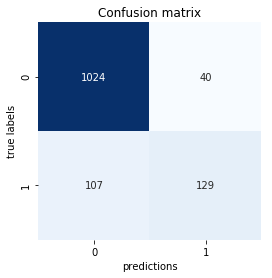

In [11]:
# Compute the accuracy of the random forest classifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

pred_test = classifier.predict(x_test)  # Predict labels of test data using the trained classifier
c_matrix = confusion_matrix(y_test, pred_test) 

rf_accuracy = accuracy_score(y_test, pred_test)
print("Accuracy of random forest: {:.2f}".format(rf_accuracy))
print("\nClassification report:")
print(classification_report(y_test, pred_test))

fig, ax = plt.subplots(1, figsize=(4, 4))
ax.set_title("Confusion matrix")
sns.heatmap(c_matrix, cmap='Blues', annot=True, fmt='g', cbar=False)
ax.set_xlabel('predictions')
ax.set_ylabel('true labels')

As you can see, the random forest classifier works quite nicely in this task without much tuning.

## A multilayer perceptron (MLP) network with two hidden layers

In the code below, define a neural network architecture with:
- input dimensionality 11
- one hidden layer with 100 units with ReLU nonlinearity
- one hidden layer with 100 units with ReLU nonlinearity
- linear output layer with output dimensionality 2.

**Please do not use [`torch.nn.Sequential`](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential) in your code.**

You may want to look at [this tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) for reference.

In [12]:
n_inputs = 11

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # YOUR CODE HERE
        self.fc1=nn.Linear(n_inputs,100)
        self.fc2=nn.Linear(100,100)
        self.fc3=nn.Linear(100,2)
        
        #raise NotImplementedError()

    def forward(self, x):
        # YOUR CODE HERE
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
        #raise NotImplementedError()

In [13]:
# Let us create the network and make sure it can process a random input of the right shape
mlp = MLP()
y = mlp(torch.randn(10, n_inputs))
assert y.shape == torch.Size([10, 2]), "Bad shape of y: y.shape={}".format(y.shape)

One can also create an instance of a simple deep network using [`torch.nn.Sequential`](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential).

In the cell below, please use [`torch.nn.Sequential`](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential)
to create an MLP with the same structure as above.

In [14]:
# This function should return an MLP model created with torch.nn.Sequential
# - input dimensionality 11
# - one hidden layer with 100 units with ReLU nonlinearity
# - one hidden layer with 100 units with ReLU nonlinearity
# - linear output layer with output dimensionality 2.
# mlp_seq = nn.Sequential(...
# YOUR CODE HERE
mlp_seq=nn.Sequential(
        nn.Linear(n_inputs,100),
        nn.ReLU(),
        nn.Linear(100,100),
        nn.ReLU(),
        nn.Linear(100,2)
        )
#raise NotImplementedError()

In [15]:
# Print the network
print(mlp_seq)

Sequential(
  (0): Linear(in_features=11, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=2, bias=True)
)


In [16]:
# Let us feed a random input of the right shape to the network created with torch.nn.Sequential.
y = mlp_seq(torch.randn(10, n_inputs))
assert y.shape == torch.Size([10, 2]), "Bad shape of y: y.shape={}".format(y.shape)

## Train an MLP network

Next we will train the multilayer perceptron network. For better understanding of the training process you can take a look at [this part of the tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop).

### Data scaling

Even though deep learning is supposed to work well on raw data without much feature engineering, it is usually a good idea to pre-process data so that the inputs have zero mean and unit standard deviation. PyTorch has its own tools for preprocessing but let us use sklearn's `StandardScaler` for now.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
print(type(y_train))

<class 'numpy.ndarray'>


### Training loop

Let us implement the training loop. We will use the Adam optimizer with learning rate 0.01 and we will process the data in the full-batch model (without splitting the data into mini-batches).

*Your task is to insert the missing code. You may find it useful to look at [this tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py).*
Your should have the following steps:
* Transform `x_train_scaled` and `y_train` to `torch.tensor`, make sure the tensors have proper types and they go to the specified `device`.
* Set all gradient values to zeros.
* Calculate outputs of the MLP network (call them `outputs`).
* Calculate cross entropy loss using [`torch.nn.functional.cross_entropy`](https://pytorch.org/docs/stable/nn.html#torch.nn.functional.cross_entropy).
* Backpropagate the loss: compute the gradients of the loss wrt to all the parameters of the MLP.
* Update the parameters of the model using the `optimizer`.

In [19]:
mlp = MLP()
mlp.to(device)
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.005)
n_epochs = 1000

train_accuracy_history = []
test_accuracy_history = []
x_train_scaled=torch.tensor(x_train_scaled,device=device, dtype=torch.float)
y_train=torch.tensor(y_train,device=device, dtype=torch.long)
for epoch in range(n_epochs):
    # - You need to specify dtype when converting data to torch.tensor
    # - Call the outputs of the model "outputs" like in the line below
    # outputs =  mlp.forward(...)
    # YOUR CODE HERE
    
    optimizer.zero_grad()   # zero the gradient buffers
    outputs = mlp.forward(x_train_scaled)
    loss = F.cross_entropy(outputs, y_train)
    loss.backward()
    optimizer.step()
    #raise NotImplementedError()
    
    if skip_training:
        break

    if (epoch % 1) == 0:
        # Store the progress of training
        with torch.no_grad():
            # outputs is the output of the model produced with forward function
            logits = outputs.cpu().data.numpy()
            pred_train = logits.argmax(axis=1)
            train_accuracy = accuracy_score(pred_train, y_train)

            # Compute test error
            x = torch.tensor(x_test_scaled, device=device, dtype=torch.float)
            outputs = mlp.forward(x)
            logits = outputs.cpu().data.numpy()
            pred_test = logits.argmax(axis=1)
            test_accuracy = accuracy_score(pred_test, y_test)
            train_accuracy_history.append(train_accuracy)
            test_accuracy_history.append(test_accuracy)
            print('Train Epoch {}: Loss: {:.6f} Train accuracy {:.2f} Test accuracy {:.2f}'.format(
                epoch, loss.item(), train_accuracy, test_accuracy))

Train Epoch 0: Loss: 0.619694 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 1: Loss: 0.520542 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 2: Loss: 0.486734 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 3: Loss: 0.481585 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 4: Loss: 0.470230 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 5: Loss: 0.452169 Train accuracy 0.80 Test accuracy 0.82
Train Epoch 6: Loss: 0.436931 Train accuracy 0.80 Test accuracy 0.83
Train Epoch 7: Loss: 0.428293 Train accuracy 0.81 Test accuracy 0.83
Train Epoch 8: Loss: 0.424658 Train accuracy 0.82 Test accuracy 0.83
Train Epoch 9: Loss: 0.421962 Train accuracy 0.82 Test accuracy 0.82
Train Epoch 10: Loss: 0.417443 Train accuracy 0.82 Test accuracy 0.82
Train Epoch 11: Loss: 0.410922 Train accuracy 0.82 Test accuracy 0.82
Train Epoch 12: Loss: 0.403938 Train accuracy 0.82 Test accuracy 0.83
Train Epoch 13: Loss: 0.398165 Train accuracy 0.83 Test accuracy 0.83
Train Epoch 14: Loss: 0.394491

Train Epoch 120: Loss: 0.255694 Train accuracy 0.88 Test accuracy 0.84
Train Epoch 121: Loss: 0.255547 Train accuracy 0.89 Test accuracy 0.85
Train Epoch 122: Loss: 0.255266 Train accuracy 0.89 Test accuracy 0.84
Train Epoch 123: Loss: 0.253101 Train accuracy 0.89 Test accuracy 0.85
Train Epoch 124: Loss: 0.251003 Train accuracy 0.89 Test accuracy 0.85
Train Epoch 125: Loss: 0.249060 Train accuracy 0.89 Test accuracy 0.84
Train Epoch 126: Loss: 0.248272 Train accuracy 0.89 Test accuracy 0.85
Train Epoch 127: Loss: 0.248376 Train accuracy 0.89 Test accuracy 0.84
Train Epoch 128: Loss: 0.247807 Train accuracy 0.90 Test accuracy 0.85
Train Epoch 129: Loss: 0.247161 Train accuracy 0.89 Test accuracy 0.84
Train Epoch 130: Loss: 0.244878 Train accuracy 0.90 Test accuracy 0.85
Train Epoch 131: Loss: 0.242919 Train accuracy 0.89 Test accuracy 0.84
Train Epoch 132: Loss: 0.241498 Train accuracy 0.90 Test accuracy 0.84
Train Epoch 133: Loss: 0.240535 Train accuracy 0.90 Test accuracy 0.84
Train 

Train Epoch 236: Loss: 0.163816 Train accuracy 0.94 Test accuracy 0.85
Train Epoch 237: Loss: 0.161961 Train accuracy 0.94 Test accuracy 0.85
Train Epoch 238: Loss: 0.160588 Train accuracy 0.94 Test accuracy 0.85
Train Epoch 239: Loss: 0.160837 Train accuracy 0.94 Test accuracy 0.84
Train Epoch 240: Loss: 0.160467 Train accuracy 0.94 Test accuracy 0.86
Train Epoch 241: Loss: 0.159658 Train accuracy 0.94 Test accuracy 0.85
Train Epoch 242: Loss: 0.158396 Train accuracy 0.94 Test accuracy 0.85
Train Epoch 243: Loss: 0.157922 Train accuracy 0.94 Test accuracy 0.86
Train Epoch 244: Loss: 0.157971 Train accuracy 0.94 Test accuracy 0.85
Train Epoch 245: Loss: 0.157197 Train accuracy 0.94 Test accuracy 0.86
Train Epoch 246: Loss: 0.156550 Train accuracy 0.94 Test accuracy 0.85
Train Epoch 247: Loss: 0.155679 Train accuracy 0.94 Test accuracy 0.85
Train Epoch 248: Loss: 0.154978 Train accuracy 0.94 Test accuracy 0.85
Train Epoch 249: Loss: 0.154688 Train accuracy 0.94 Test accuracy 0.85
Train 

Train Epoch 352: Loss: 0.147621 Train accuracy 0.93 Test accuracy 0.82
Train Epoch 353: Loss: 0.160635 Train accuracy 0.93 Test accuracy 0.85
Train Epoch 354: Loss: 0.146386 Train accuracy 0.93 Test accuracy 0.85
Train Epoch 355: Loss: 0.109355 Train accuracy 0.97 Test accuracy 0.83
Train Epoch 356: Loss: 0.130122 Train accuracy 0.96 Test accuracy 0.85
Train Epoch 357: Loss: 0.152403 Train accuracy 0.93 Test accuracy 0.84
Train Epoch 358: Loss: 0.115263 Train accuracy 0.96 Test accuracy 0.84
Train Epoch 359: Loss: 0.124303 Train accuracy 0.96 Test accuracy 0.86
Train Epoch 360: Loss: 0.142984 Train accuracy 0.93 Test accuracy 0.85
Train Epoch 361: Loss: 0.113136 Train accuracy 0.96 Test accuracy 0.83
Train Epoch 362: Loss: 0.121381 Train accuracy 0.96 Test accuracy 0.86
Train Epoch 363: Loss: 0.130186 Train accuracy 0.95 Test accuracy 0.85
Train Epoch 364: Loss: 0.109064 Train accuracy 0.96 Test accuracy 0.84
Train Epoch 365: Loss: 0.115406 Train accuracy 0.96 Test accuracy 0.86
Train 

Train Epoch 472: Loss: 0.074864 Train accuracy 0.98 Test accuracy 0.87
Train Epoch 473: Loss: 0.075199 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 474: Loss: 0.075713 Train accuracy 0.98 Test accuracy 0.87
Train Epoch 475: Loss: 0.075928 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 476: Loss: 0.075929 Train accuracy 0.98 Test accuracy 0.87
Train Epoch 477: Loss: 0.075261 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 478: Loss: 0.074325 Train accuracy 0.98 Test accuracy 0.87
Train Epoch 479: Loss: 0.073232 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 480: Loss: 0.072449 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 481: Loss: 0.072135 Train accuracy 0.98 Test accuracy 0.87
Train Epoch 482: Loss: 0.072241 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 483: Loss: 0.072693 Train accuracy 0.98 Test accuracy 0.87
Train Epoch 484: Loss: 0.073313 Train accuracy 0.98 Test accuracy 0.86
Train Epoch 485: Loss: 0.074200 Train accuracy 0.98 Test accuracy 0.87
Train 

Train Epoch 588: Loss: 0.052810 Train accuracy 0.99 Test accuracy 0.85
Train Epoch 589: Loss: 0.052757 Train accuracy 0.99 Test accuracy 0.87
Train Epoch 590: Loss: 0.052210 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 591: Loss: 0.051604 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 592: Loss: 0.050793 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 593: Loss: 0.050130 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 594: Loss: 0.049754 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 595: Loss: 0.049703 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 596: Loss: 0.049864 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 597: Loss: 0.050093 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 598: Loss: 0.050389 Train accuracy 0.99 Test accuracy 0.87
Train Epoch 599: Loss: 0.050536 Train accuracy 0.99 Test accuracy 0.85
Train Epoch 600: Loss: 0.050814 Train accuracy 0.99 Test accuracy 0.87
Train Epoch 601: Loss: 0.050700 Train accuracy 0.99 Test accuracy 0.85
Train 

Train Epoch 709: Loss: 0.034981 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 710: Loss: 0.035204 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 711: Loss: 0.035163 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 712: Loss: 0.035116 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 713: Loss: 0.034695 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 714: Loss: 0.034291 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 715: Loss: 0.033715 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 716: Loss: 0.033265 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 717: Loss: 0.033041 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 718: Loss: 0.033031 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 719: Loss: 0.033174 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 720: Loss: 0.033374 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 721: Loss: 0.033643 Train accuracy 0.99 Test accuracy 0.86
Train Epoch 722: Loss: 0.033802 Train accuracy 0.99 Test accuracy 0.86
Train 

Train Epoch 828: Loss: 0.023594 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 829: Loss: 0.023298 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 830: Loss: 0.023132 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 831: Loss: 0.023105 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 832: Loss: 0.023172 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 833: Loss: 0.023328 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 834: Loss: 0.023458 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 835: Loss: 0.023667 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 836: Loss: 0.023692 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 837: Loss: 0.023772 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 838: Loss: 0.023519 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 839: Loss: 0.023226 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 840: Loss: 0.022774 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 841: Loss: 0.022450 Train accuracy 1.00 Test accuracy 0.86
Train 

Train Epoch 951: Loss: 0.016308 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 952: Loss: 0.016353 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 953: Loss: 0.016429 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 954: Loss: 0.016433 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 955: Loss: 0.016395 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 956: Loss: 0.016264 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 957: Loss: 0.016176 Train accuracy 1.00 Test accuracy 0.87
Train Epoch 958: Loss: 0.016030 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 959: Loss: 0.015895 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 960: Loss: 0.015803 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 961: Loss: 0.015766 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 962: Loss: 0.015777 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 963: Loss: 0.015820 Train accuracy 1.00 Test accuracy 0.86
Train Epoch 964: Loss: 0.015884 Train accuracy 1.00 Test accuracy 0.87
Train 

The accuracy should be comparable to the accuracy of the random forest classifier.

In [20]:
# Save the network to a file, submit this file together with your notebook
filename = '1_mlp.pth'
if not skip_training:
    try:
        do_save = input('Do you want to save the model (type yes to confirm)? ').lower()
        if do_save == 'yes':
            torch.save(mlp.state_dict(), filename)
            print('Model saved to %s' % filename)
        else:
            print('Model not saved')
    except:
        raise Exception('The notebook should be run or validated with skip_training=False.')
else:
    mlp = MLP()
    mlp.load_state_dict(torch.load(filename, map_location=lambda storage, loc: storage))
    print('Model loaded from %s' % filename)
    mlp = mlp.to(device)
    mlp.eval()

Do you want to save the model (type yes to confirm)? yes
Model saved to 1_mlp.pth


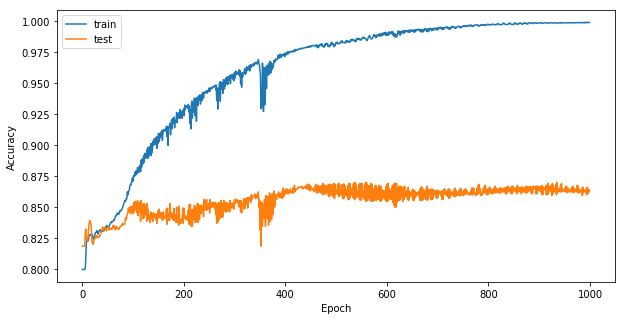

In [21]:
# Let us plot the accuracies during training
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(train_accuracy_history, label='train')
ax.plot(test_accuracy_history, label='test')
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epoch")
ax.legend()


Classification report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1064
           1       0.63      0.62      0.62       236

   micro avg       0.86      0.86      0.86      1300
   macro avg       0.77      0.77      0.77      1300
weighted avg       0.86      0.86      0.86      1300



Text(15,0.5,'true labels')

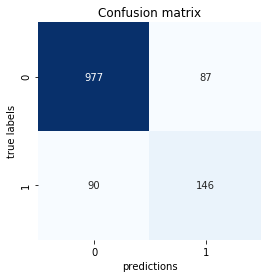

In [22]:
# Let's print the classification report and plot the confusion matrix similarly to the random forest classifier.
print("\nClassification report:")
print(classification_report(y_test, pred_test))

c_matrix = confusion_matrix(y_test, pred_test)
fig, ax = plt.subplots(1, figsize=(4, 4))
ax.set_title("Confusion matrix")
sns.heatmap(c_matrix, cmap='Blues', annot=True, fmt='g', cbar=False)
ax.set_xlabel('predictions')
ax.set_ylabel('true labels')

Note that even though the random forest classifier may have better performance, the performance of the MLP network may be improved by tuning the hyperparameters, such as:
* number of hidden units
* number of layers
* learning rate schedule
* regularization methods.

The message from this exercise is that in simple problems that do not have spatial (like in images) or temporal (like in time series) structure, alternative classifiers (like random forests) may do very well.

## Define an MLP with an arbitrary number of layers

Let us now define a multilayer perceptron with an arbitrary number of layers and arbitrary number of neurons in each layer, so that an MLP can be created as follows:
```python
> mlp = FancyMLP([11, 150, 100, 50, 2], activation_fn=F.tanh)
```
In the example above, we created a network with three hidden layers: 150 units in the first hidden layer, 100 units in the second one and 50 units in the third one.

Note: The same activation function should be applied to all the layers except for the last one. This way the MLP can be used either for regression or classification.

Hints:
* You may find it useful to use function [`torch.nn.Module.add_module`](https://pytorch.org/docs/master/nn.html#torch.nn.Module.add_module) or class [`torch.nn.ModuleList`](https://pytorch.org/docs/stable/nn.html#torch.nn.ModuleList).
* Check how many trainable parameters a created MLP has.

In [23]:
class FancyMLP(nn.Module):
    def __init__(self, sizes, activation_fn=torch.tanh):
        """Multilayer perceptron with an arbitrary number of layers.
        
        Args:
          sizes (list):             Number of units in each layer including the input and the output layer:
                                    [n_inputs, n_units_in_hidden_layer1, ..., n_units_in_hidden_layerN, n_outputs]
          activation_fn (callable): An element-wise function used in every layer except in the last one.
        """
        # YOUR CODE HERE
        super(FancyMLP, self).__init__()
        self.sizes=sizes
        #print(len(self.sizes))
        self.activation_fn=activation_fn
        #self.layers={}
        #for i in range(0,len(sizes)-1):
            #self.layers[i]=nn.Linear(sizes[i],sizes[i+1])
        #raise NotImplementedError()
        self.linears=nn.ModuleList([nn.Linear(sizes[i],sizes[i+1]) for i in range(0,len(sizes)-1)])

    def forward(self, x):
        # YOUR CODE HERE
        for i in range(0,len(self.linears)):
            if i!= len(self.linears)-1:
                x=self.activation_fn(self.linears[i](x))
            else:
                x=self.linears[i](x)
        return x
        #raise NotImplementedError()

In [24]:
# Let us now test your class
mlp = FancyMLP([n_inputs, 100, 50, 2])
y = mlp(torch.randn(10, n_inputs))
assert y.shape == torch.Size([10, 2]), "Bad shape of y: y.shape={}".format(y.shape)

mlp = FancyMLP([3, 10, 30, 40, 50, 5])
y = mlp(torch.randn(10, 3))
assert y.shape == torch.Size([10, 5]), "Bad shape of y: y.shape={}".format(y.shape)

In [25]:
# Print the MLP
mlp

FancyMLP(
  (linears): ModuleList(
    (0): Linear(in_features=3, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=40, bias=True)
    (3): Linear(in_features=40, out_features=50, bias=True)
    (4): Linear(in_features=50, out_features=5, bias=True)
  )
)